In [1]:
import pandas as pd
from pycaret.regression import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv('train_soc.csv')
df2 = pd.read_csv('test_soc.csv')

### With base Data

In [3]:
df3 = pd.read_csv('train_soc.csv')

In [4]:
df3.drop(['olc_id', 'UUID','sample_id'],axis=1,inplace=True)

In [5]:
exp_name = setup(data = df3, target = 'logoc_d.f', session_id=6053, train_size = 0.7,remove_multicollinearity=True)
best4 = compare_models(exclude=['lightgbm'], n_select=4)

,Description,Value
0,Session id,6053
1,Target,logoc_d.f
2,Target type,Regression
3,Original data shape,"(23898, 224)"
4,Transformed data shape,"(23898, 127)"
5,Transformed train set shape,"(16728, 127)"
6,Transformed test set shape,"(7170, 127)"
7,Numeric features,223
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3991,0.2922,0.5404,0.7194,0.1708,0.2574,4.4500
xgboost,Extreme Gradient Boosting,0.3968,0.2947,0.5426,0.7170,0.1699,0.2503,0.2430
et,Extra Trees Regressor,0.3909,0.2963,0.5441,0.7156,0.1696,0.2463,1.6540
rf,Random Forest Regressor,0.4195,0.3359,0.5793,0.6776,0.1808,0.2678,3.2110
gbr,Gradient Boosting Regressor,0.4804,0.4070,0.6378,0.6093,0.2021,0.3232,1.2080
ada,AdaBoost Regressor,0.6159,0.6077,0.7794,0.4163,0.2531,0.4535,0.6950
dt,Decision Tree Regressor,0.5948,0.6892,0.8299,0.3382,0.2571,0.3468,0.2350
knn,K Neighbors Regressor,0.6478,0.7076,0.8408,0.3204,0.2576,0.4110,0.1720
ridge,Ridge Regression,0.6450,0.7316,0.8548,0.2974,0.2511,0.4170,0.1510
lr,Linear Regression,0.6450,0.7316,0.8548,0.2974,0.2511,0.4170,0.3030


In [6]:
tuned_top1 = tune_model(best4[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3706,0.2485,0.4985,0.7616,0.1566,0.2054
1,0.3804,0.2801,0.5292,0.7374,0.1637,0.2091
2,0.3681,0.2576,0.5076,0.7514,0.1627,0.3284
3,0.3796,0.2734,0.5229,0.7377,0.1654,0.2165
4,0.3936,0.2931,0.5414,0.7145,0.1617,0.2236
5,0.3657,0.2545,0.5045,0.7552,0.1550,0.2469
6,0.3909,0.2988,0.5466,0.7251,0.1724,0.2372
7,0.3950,0.2896,0.5381,0.7350,0.1718,0.2790
8,0.3804,0.2704,0.5200,0.7412,0.1604,0.2089


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [7]:
tuned_top2 = tune_model(best4[1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4396,0.3382,0.5815,0.6756,0.1845,0.2642
1,0.4381,0.3414,0.5843,0.6799,0.1847,0.2496
2,0.4365,0.3457,0.5879,0.6664,0.1904,0.4467
3,0.4426,0.3464,0.5885,0.6677,0.1866,0.2561
4,0.4534,0.3626,0.6021,0.6468,0.1840,0.2654
5,0.4337,0.3321,0.5762,0.6806,0.1776,0.2869
6,0.4591,0.3863,0.6215,0.6445,0.1942,0.2761
7,0.4618,0.3773,0.6143,0.6547,0.1954,0.3292
8,0.4461,0.3491,0.5909,0.6658,0.1863,0.2585


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [8]:
tuned_top3 = tune_model(best4[2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6601,0.7079,0.8413,0.3209,0.2610,0.4363
1,0.6810,0.7442,0.8626,0.3024,0.2693,0.4163
2,0.6624,0.7332,0.8563,0.2924,0.2708,0.7103
3,0.6699,0.7260,0.8521,0.3035,0.2675,0.4201
4,0.6794,0.7506,0.8664,0.2688,0.2596,0.4366
5,0.6629,0.7225,0.8500,0.3052,0.2601,0.4661
6,0.6836,0.7544,0.8686,0.3058,0.2678,0.4567
7,0.6977,0.7702,0.8776,0.2952,0.2741,0.5233
8,0.6920,0.7403,0.8604,0.2915,0.2701,0.4401


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [9]:
tuned_top4 = tune_model(best4[3])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5782,0.5877,0.7666,0.4362,0.2363,0.3651
1,0.5658,0.5641,0.7511,0.4712,0.2334,0.3347
2,0.5846,0.6074,0.7794,0.4138,0.2441,0.5955
3,0.5734,0.5780,0.7603,0.4454,0.2372,0.3432
4,0.5787,0.6026,0.7763,0.4130,0.2313,0.3557
5,0.5615,0.5826,0.7633,0.4397,0.2328,0.3929
6,0.5969,0.6363,0.7977,0.4145,0.2447,0.3823
7,0.5831,0.6091,0.7804,0.4426,0.2424,0.4232
8,0.5697,0.5430,0.7369,0.4803,0.2310,0.3452


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [10]:
blender = blend_models([tuned_top1,tuned_top2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3669,0.2438,0.4937,0.7661,0.1559,0.2067
1,0.3774,0.2735,0.5229,0.7436,0.1634,0.2121
2,0.3707,0.2612,0.5111,0.7479,0.1648,0.3459
3,0.3756,0.2696,0.5192,0.7414,0.1637,0.2144
4,0.3943,0.2950,0.5431,0.7127,0.1631,0.2248
5,0.3630,0.2548,0.5048,0.7549,0.1558,0.2489
6,0.3892,0.2919,0.5403,0.7314,0.1705,0.2377
7,0.3896,0.2845,0.5334,0.7397,0.1706,0.2766
8,0.3808,0.2749,0.5243,0.7369,0.1614,0.2084


In [11]:
stacker = stack_models([tuned_top1,tuned_top2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3641,0.2408,0.4907,0.7690,0.1545,0.2015
1,0.3749,0.2739,0.5234,0.7432,0.1620,0.2073
2,0.3667,0.2564,0.5063,0.7526,0.1622,0.3279
3,0.3730,0.2686,0.5182,0.7423,0.1632,0.2120
4,0.3898,0.2903,0.5388,0.7172,0.1616,0.2223
5,0.3615,0.2512,0.5012,0.7585,0.1543,0.2466
6,0.3879,0.2904,0.5389,0.7328,0.1702,0.2355
7,0.3887,0.2834,0.5324,0.7406,0.1699,0.2747
8,0.3768,0.2691,0.5188,0.7424,0.1596,0.2055


In [12]:
predict_1 = predict_model(blender, data=df2)

In [13]:
predict_2 = predict_model(stacker, data=df2)

In [15]:
# predict_1

output = predict_1[['sample_id','prediction_label']]
output

In [17]:
output = output.rename(columns={'prediction_label':'logoc_d.f'})
output

,sample_id,logoc_d.f
0,42384,2.537548
1,49785,1.615666
2,47076,2.223543
3,11252,1.342687
4,11044,3.185643
...,...,...
7133,4728,3.224678
7134,3383,2.722355
7135,5714,3.428964
7136,3126,2.946188


In [18]:
# output.to_csv('submission.csv', index=False)

### After Feature Selection

In [3]:
df1

,olc_id,UUID,X,Y,observation_year,hzn_top,hzn_bot,bioclim.var_chelsa.bio12_m_1km_s_1981_2010_go_epsg.4326_v20231002,bioclim.var_chelsa.bio13_m_1km_s_1981_2010_go_epsg.4326_v20231002,bioclim.var_chelsa.bio16_m_1km_s_1981_2010_go_epsg.4326_v20231002,...,wetlands.cw_upmc.wtd_c_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wetlands.groundwater-driven_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wetlands.permanent_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wetlands.regularly-flooded_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wv_mcd19a2v061.seasconv.m.yearly_p25_1km_s_0101_1231_go_epsg.4326_v20230619,wv_mcd19a2v061.seasconv.m.yearly_p50_1km_s_0101_1231_go_epsg.4326_v20230619,wv_mcd19a2v061.seasconv.m.yearly_p75_1km_s_0101_1231_go_epsg.4326_v20230619,wv_mcd19a2v061.seasconv.m.yearly_sd_1km_s_0101_1231_go_epsg.4326_v20230619,sample_id,logoc_d.f
0,87QJ79FW+W38,b1815dfa-b862-11ee-843e-0242ac110004,2.193808e+06,2.806497e+06,2017,10,40,12466,1287,3769,...,0,0,0,0,506,1054,2020,755,84019,5.220388
1,87RJP2G3+6FV,b17f3ef8-b862-11ee-843e-0242ac110004,2.117680e+06,2.951602e+06,2012,0,10,10606,1081,3088,...,0,0,0,0,504,1035,1538,680,58825,3.335679
2,87PHW8F8+9M6,b17f42ae-b862-11ee-843e-0242ac110004,2.123917e+06,2.744570e+06,2012,3,8,11285,1189,3333,...,0,0,0,0,565,1030,1694,742,96207,3.887080
3,87QHQ3RV+JMH,b17eca9a-b862-11ee-843e-0242ac110004,2.079950e+06,2.832242e+06,2010,18,24,11800,1183,3428,...,3,0,50,50,493,958,1591,731,97127,2.100720
4,87RHG7CP+H42,b17e5808-b862-11ee-843e-0242ac110004,2.071283e+06,2.914094e+06,2009,6,21,12825,1303,3775,...,0,31,0,0,412,519,1147,552,66739,3.939469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23893,86258R2J+P7R,b1821e16-b862-11ee-843e-0242ac110004,-1.626457e+04,8.028978e+05,2020,0,17,11456,1237,3332,...,0,0,0,0,1372,1998,3158,1181,88782,3.663562
23894,86258R2J+P7R,b1821e2a-b862-11ee-843e-0242ac110004,-1.626457e+04,8.028978e+05,2020,17,51,11456,1237,3332,...,0,0,0,0,1372,1998,3158,1181,80801,3.015535
23895,86258R2J+P7R,b1821e34-b862-11ee-843e-0242ac110004,-1.626457e+04,8.028978e+05,2020,51,104,11456,1237,3332,...,0,0,0,0,1372,1998,3158,1181,63258,2.564949
23896,86258R2J+P7R,b1821e3e-b862-11ee-843e-0242ac110004,-1.626457e+04,8.028978e+05,2020,104,132,11456,1237,3332,...,0,0,0,0,1372,1998,3158,1181,76115,1.078410


In [4]:
df2

,olc_id,UUID,X,Y,observation_year,hzn_top,hzn_bot,bioclim.var_chelsa.bio12_m_1km_s_1981_2010_go_epsg.4326_v20231002,bioclim.var_chelsa.bio13_m_1km_s_1981_2010_go_epsg.4326_v20231002,bioclim.var_chelsa.bio16_m_1km_s_1981_2010_go_epsg.4326_v20231002,...,veg_evi_mod13q1.v061_sd_250m_s0..0cm__v1.0,wetlands.cw_upmc.wtd_c_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wetlands.groundwater-driven_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wetlands.permanent_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wetlands.regularly-flooded_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wv_mcd19a2v061.seasconv.m.yearly_p25_1km_s_0101_1231_go_epsg.4326_v20230619,wv_mcd19a2v061.seasconv.m.yearly_p50_1km_s_0101_1231_go_epsg.4326_v20230619,wv_mcd19a2v061.seasconv.m.yearly_p75_1km_s_0101_1231_go_epsg.4326_v20230619,wv_mcd19a2v061.seasconv.m.yearly_sd_1km_s_0101_1231_go_epsg.4326_v20230619,sample_id
0,868F4F8F+GXM,b17f30d4-b862-11ee-843e-0242ac110004,4.881052e+05,1.465831e+06,2011,4.0,110.0,12905,1329,3737,...,2305,0,15,0,0,875,1407,2418,1170,42384
1,85MF3WQF+MC9,b17dc5dc-b862-11ee-843e-0242ac110004,-1.135814e+06,2.316936e+06,2006,130.0,160.0,5993,732,1829,...,374,0,25,0,0,357,422,551,180,49785
2,86V8MX56+X6V,b17cc57e-b862-11ee-843e-0242ac110004,2.238996e+05,2.744133e+06,2002,20.0,48.0,7351,1140,3184,...,704,0,2,0,0,441,657,1749,770,47076
3,76X4XC64+FG3,b17e349a-b862-11ee-843e-0242ac110004,-1.536711e+05,7.663498e+05,2008,142.0,166.0,9289,1231,2803,...,882,0,4,0,0,970,1405,2649,905,11252
4,86437X3R+4GF,b17ee836-b862-11ee-843e-0242ac110004,-1.882943e+05,1.021947e+06,2010,0.0,12.0,8831,1171,3016,...,438,0,0,0,0,912,1535,2792,1075,11044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7133,2G3XQP7C+535,5af54e1e-c065-11ee-88c9-0242ac110002,6.587437e+05,1.882549e+06,2021,15.0,30.0,10021,1121,3290,...,2208,3,0,100,0,743,1205,2097,956,4728
7134,2G3XRVWM+JPP,5af54e28-c065-11ee-88c9-0242ac110002,6.643174e+05,1.901452e+06,2021,30.0,60.0,10287,1172,3407,...,2775,2,0,50,50,704,1289,1986,962,3383
7135,2G3XRVVM+F6R,5af54e32-c065-11ee-88c9-0242ac110002,6.640848e+05,1.901295e+06,2021,0.0,30.0,10287,1172,3407,...,2569,2,0,50,50,704,1289,1986,962,5714
7136,2G3XCR5P+HGJ,5af54e3c-c065-11ee-88c9-0242ac110002,6.277620e+05,1.893111e+06,2021,15.0,30.0,10220,1215,3461,...,2434,1,100,0,0,749,1307,1899,1030,3126


In [5]:
df1.isnull().sum().unique()

array([0])

In [6]:
list[df1.columns]

list[Index(['olc_id', 'UUID', 'X', 'Y', 'observation_year', 'hzn_top', 'hzn_bot',
       'bioclim.var_chelsa.bio12_m_1km_s_1981_2010_go_epsg.4326_v20231002',
       'bioclim.var_chelsa.bio13_m_1km_s_1981_2010_go_epsg.4326_v20231002',
       'bioclim.var_chelsa.bio16_m_1km_s_1981_2010_go_epsg.4326_v20231002',
       ...
       'wetlands.cw_upmc.wtd_c_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002',
       'wetlands.groundwater-driven_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002',
       'wetlands.permanent_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002',
       'wetlands.regularly-flooded_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002',
       'wv_mcd19a2v061.seasconv.m.yearly_p25_1km_s_0101_1231_go_epsg.4326_v20230619',
       'wv_mcd19a2v061.seasconv.m.yearly_p50_1km_s_0101_1231_go_epsg.4326_v20230619',
       'wv_mcd19a2v061.seasconv.m.yearly_p75_1km_s_0101_1231_go_epsg.4326_v20230619',
       'wv_mcd19a2v061.seasconv.m.yearly_sd_1km_s_0101_1231

In [7]:
df1.drop(['olc_id', 'UUID','sample_id'],axis=1,inplace=True)

In [8]:
df1['distance'] = np.sqrt(df1['X']**2 + df1['Y']**2)

In [9]:
df1.drop(['X', 'Y'],axis=1,inplace=True)

In [10]:
df2['distance'] = np.sqrt(df2['X']**2 + df2['Y']**2)

In [11]:
df2.drop(['X', 'Y'],axis=1,inplace=True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23898 entries, 0 to 23897
Columns: 223 entries, observation_year to distance
dtypes: float64(2), int64(221)
memory usage: 40.7 MB


In [13]:
# plt.figure(figsize=(150,150))
# ax = sns.heatmap(df1.corr(),annot=True,linewidth=0.1)
# plt.savefig("heat.jpg",dpi=300)

In [14]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = df1.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df1.values, i) 
                          for i in range(len(df1.columns))] 
  
print(vif_data)

                                               feature         VIF
0                                     observation_year    1.825838
1                                              hzn_top   19.465915
2                                              hzn_bot   20.207011
3    bioclim.var_chelsa.bio12_m_1km_s_1981_2010_go_...   31.438078
4    bioclim.var_chelsa.bio13_m_1km_s_1981_2010_go_...  158.698172
..                                                 ...         ...
218  wv_mcd19a2v061.seasconv.m.yearly_p50_1km_s_010...   14.235960
219  wv_mcd19a2v061.seasconv.m.yearly_p75_1km_s_010...   20.799925
220  wv_mcd19a2v061.seasconv.m.yearly_sd_1km_s_0101...   22.023106
221                                          logoc_d.f    1.639984
222                                           distance    6.310904

[223 rows x 2 columns]


In [15]:
vi = vif_data.loc[vif_data.VIF <=10]
vi2 = vif_data.loc[vif_data.VIF > 10]

In [16]:
vi2

,feature,VIF
1,hzn_top,19.465915
2,hzn_bot,20.207011
3,bioclim.var_chelsa.bio12_m_1km_s_1981_2010_go_...,31.438078
4,bioclim.var_chelsa.bio13_m_1km_s_1981_2010_go_...,158.698172
5,bioclim.var_chelsa.bio16_m_1km_s_1981_2010_go_...,190.221298
...,...,...
212,veg_evi_mod13q1.v061_sd_250m_s0..0cm__v1.0,55.368688
217,wv_mcd19a2v061.seasconv.m.yearly_p25_1km_s_010...,11.472085
218,wv_mcd19a2v061.seasconv.m.yearly_p50_1km_s_010...,14.235960
219,wv_mcd19a2v061.seasconv.m.yearly_p75_1km_s_010...,20.799925


In [17]:
# VIF dataframe 
df101 = df1[ ['dtm_lithology_usgs.ecotapestry.acid.plutonics_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.acid.volcanic_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.basic.plutonics_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.basic.volcanics_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.carbonate.sedimentary.rock_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.intermediate.plutonics_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.intermediate.volcanics_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.metamorphics_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.mixed.sedimentary.rock_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.pyroclastics_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.siliciclastic.sedimentary_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.unconsolidated.sediment_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry.undefined_p_250m_s0..0cm_2014_v1.0',
 'dtm_lithology_usgs.ecotapestry_c_250m_s0..0cm_2014_v1.0']]

vif_data1 = pd.DataFrame() 
vif_data1["feature"] = df101.columns 
  
# calculating VIF for each feature 
vif_data1["VIF"] = [variance_inflation_factor(df101.values, i) 
                          for i in range(len(df101.columns))] 
  
print(vif_data1)

                                              feature          VIF
0   dtm_lithology_usgs.ecotapestry.acid.plutonics_...     2.143527
1   dtm_lithology_usgs.ecotapestry.acid.volcanic_p...     2.905241
2   dtm_lithology_usgs.ecotapestry.basic.plutonics...     2.924332
3   dtm_lithology_usgs.ecotapestry.basic.volcanics...    18.746616
4   dtm_lithology_usgs.ecotapestry.carbonate.sedim...    54.245456
5   dtm_lithology_usgs.ecotapestry.intermediate.pl...     2.282888
6   dtm_lithology_usgs.ecotapestry.intermediate.vo...    14.685092
7   dtm_lithology_usgs.ecotapestry.metamorphics_p_...   137.292133
8   dtm_lithology_usgs.ecotapestry.mixed.sedimenta...   147.290424
9   dtm_lithology_usgs.ecotapestry.pyroclastics_p_...     3.474141
10  dtm_lithology_usgs.ecotapestry.siliciclastic.s...  1200.973206
11  dtm_lithology_usgs.ecotapestry.unconsolidated....  1495.240844
12  dtm_lithology_usgs.ecotapestry.undefined_p_250...    17.537227
13  dtm_lithology_usgs.ecotapestry_c_250m_s0..0cm_...  3089.52

In [18]:
vi3 = vif_data1.loc[vif_data1.VIF <= 10]

In [19]:
# VIF dataframe 
df102 = df1[ ['blue_glad.SeasConv.ard2_m_30m_s_0101_0228_go_epsg.4326_v20230908',
 'blue_glad.SeasConv.ard2_m_30m_s_0301_0430_go_epsg.4326_v20230908',
 'blue_glad.SeasConv.ard2_m_30m_s_0501_0630_go_epsg.4326_v20230908',
 'blue_glad.SeasConv.ard2_m_30m_s_0701_0831_go_epsg.4326_v20230908',
 'blue_glad.SeasConv.ard2_m_30m_s_0901_1031_go_epsg.4326_v20230908',
 'blue_glad.SeasConv.ard2_m_30m_s_1101_1231_go_epsg.4326_v20230908']]

vif_data2 = pd.DataFrame() 
vif_data2["feature"] = df102.columns 
  
# calculating VIF for each feature 
vif_data2["VIF"] = [variance_inflation_factor(df102.values, i) 
                          for i in range(len(df102.columns))] 
  
print(vif_data2)

                                             feature        VIF
0  blue_glad.SeasConv.ard2_m_30m_s_0101_0228_go_e...   3.007092
1  blue_glad.SeasConv.ard2_m_30m_s_0301_0430_go_e...   2.623688
2  blue_glad.SeasConv.ard2_m_30m_s_0501_0630_go_e...   6.813454
3  blue_glad.SeasConv.ard2_m_30m_s_0701_0831_go_e...   9.939479
4  blue_glad.SeasConv.ard2_m_30m_s_0901_1031_go_e...  11.944704
5  blue_glad.SeasConv.ard2_m_30m_s_1101_1231_go_e...   5.490582


In [20]:
vi4 = vif_data2.loc[vif_data2.VIF <= 10]

In [21]:
# VIF dataframe 
df103 = df1[ ['clm_lst_mod11a2.daytime_p05_1km_s0..0cm__v1.2',
 'clm_lst_mod11a2.daytime_p50_1km_s0..0cm__v1.2',
 'clm_lst_mod11a2.daytime_p95_1km_s0..0cm__v1.2',
 'clm_lst_mod11a2.daytime_sd_1km_s0..0cm__v1.2',
 'clm_lst_mod11a2.nighttime_p05_1km_s0..0cm__v1.2',
 'clm_lst_mod11a2.nighttime_p50_1km_s0..0cm__v1.2',
 'clm_lst_mod11a2.nighttime_p95_1km_s0..0cm__v1.2',
 'clm_lst_mod11a2.nighttime_sd_1km_s0..0cm__v1.2']]

vif_data3 = pd.DataFrame() 
vif_data3["feature"] = df103.columns 
  
# calculating VIF for each feature 
vif_data3["VIF"] = [variance_inflation_factor(df103.values, i) 
                          for i in range(len(df103.columns))] 
  
print(vif_data3)

                                           feature           VIF
0    clm_lst_mod11a2.daytime_p05_1km_s0..0cm__v1.2  29397.520156
1    clm_lst_mod11a2.daytime_p50_1km_s0..0cm__v1.2  12599.841429
2    clm_lst_mod11a2.daytime_p95_1km_s0..0cm__v1.2  43514.016758
3     clm_lst_mod11a2.daytime_sd_1km_s0..0cm__v1.2    433.318030
4  clm_lst_mod11a2.nighttime_p05_1km_s0..0cm__v1.2  42263.363354
5  clm_lst_mod11a2.nighttime_p50_1km_s0..0cm__v1.2  27238.579995
6  clm_lst_mod11a2.nighttime_p95_1km_s0..0cm__v1.2  75152.859788
7   clm_lst_mod11a2.nighttime_sd_1km_s0..0cm__v1.2    433.614813


In [22]:
vi5 = vif_data3.loc[vif_data3.VIF <= 433.4]

In [23]:
# VIF dataframe 
df104 = df1[ [ 'landform.alluvial.fan..pediment..bajada..pediplain_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.alluvial.or.coasttal.plain.gentlest.lake.plain.playa_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.alluvial.or.coasttal.plain.pediplain_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.alluvial.plain.pediplain_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.dissected.terrace.moderate.plateau_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.hills.rough.in.small.and.large.scale._terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.hills.rough.in.small.and.large.scale_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.middle.large.slope_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.moderate.mountain.rough_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.moderate.mountain.smooth_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.slope.in.and.around.terrace.or.plateau_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.steep.mountain.rough_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.steep.mountain.smooth_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.terrace.smooth.plateau_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform.upper.large.slope_terrain.class_p_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002',
 'landform_terrain.class_c_250m_s0..0cm_2017_2018_go_epsg.4326_v20231002']]

vif_data4 = pd.DataFrame() 
vif_data4["feature"] = df104.columns
  
# calculating VIF for each feature 
vif_data4["VIF"] = [variance_inflation_factor(df104.values, i) 
                          for i in range(len(df104.columns))] 
  
print(vif_data4)

                                              feature  VIF
0   landform.alluvial.fan..pediment..bajada..pedip...  inf
1   landform.alluvial.or.coasttal.plain.gentlest.l...  inf
2   landform.alluvial.or.coasttal.plain.pediplain_...  inf
3   landform.alluvial.plain.pediplain_terrain.clas...  inf
4   landform.dissected.terrace.moderate.plateau_te...  inf
5   landform.hills.rough.in.small.and.large.scale....  inf
6   landform.hills.rough.in.small.and.large.scale_...  inf
7   landform.middle.large.slope_terrain.class_p_25...  inf
8   landform.moderate.mountain.rough_terrain.class...  inf
9   landform.moderate.mountain.smooth_terrain.clas...  inf
10  landform.slope.in.and.around.terrace.or.platea...  inf
11  landform.steep.mountain.rough_terrain.class_p_...  inf
12  landform.steep.mountain.smooth_terrain.class_p...  inf
13  landform.terrace.smooth.plateau_terrain.class_...  inf
14  landform.upper.large.slope_terrain.class_p_250...  inf
15  landform_terrain.class_c_250m_s0..0cm_2017_201...  i

In [24]:
l = list(vi['feature'])
l.append('hzn_top')
l.append('hzn_bot')
l

['observation_year',
 'bioclim.var_chelsa.bio2_m_1km_s_1981_2010_go_epsg.4326_v20231002',
 'bsf_glad.SeasConv.ard2_m_30m_s_go_epsg.4326_v20230908',
 'bsi_glad.SeasConv.ard2_m_30m_s_0101_0228_go_epsg.4326_v20230908',
 'bsi_glad.SeasConv.ard2_m_30m_s_0301_0430_go_epsg.4326_v20230908',
 'bsi_glad.SeasConv.ard2_m_30m_s_0701_0831_go_epsg.4326_v20230908',
 'bsi_glad.SeasConv.ard2_m_30m_s_0901_1031_go_epsg.4326_v20230908',
 'bsi_glad.SeasConv.ard2_m_30m_s_1101_1231_go_epsg.4326_v20230908',
 'clm_accum.precipitation_chelsa.annual_m_1km_s0..0cm__v2.1',
 'downslope.curvature_merit.dem_m_250m_s0..0cm_2017_2017_go_epsg.4326_v20231002',
 'dtm_lithology_usgs.ecotapestry.evaporite_p_250m_s0..0cm_2014_v1.0',
 'lcv.forest_hilda_dv1_1km_s0..0cm__v0.1',
 'lcv_globalcropland_bowen.et.al_p_1km_s0..0cm__v0.1',
 'log1p.upstream.area_merit.hydro_m_250m_b0..0cm_2017_2017_go_epsg.4326_v20231002',
 'nightlights.average_viirs.v21_m_500m_s_0101_1231_go_epsg4326_v20230318',
 'nir_glad.SeasConv.ard2_m_30m_s_0501_063

In [25]:
l.extend(list(vi3['feature']))

In [26]:
l.extend(list(vi4['feature']))

In [27]:
l.extend(list(vi5['feature']))

In [28]:
# df55 = df1[l].copy()

In [29]:
df55 = df1.copy()

In [30]:
from scipy.stats import yeojohnson
df55.skew()

observation_year                                                              -0.161485
hzn_top                                                                        7.043379
hzn_bot                                                                        5.055812
bioclim.var_chelsa.bio12_m_1km_s_1981_2010_go_epsg.4326_v20231002              1.094438
bioclim.var_chelsa.bio13_m_1km_s_1981_2010_go_epsg.4326_v20231002              2.151761
                                                                                 ...   
wv_mcd19a2v061.seasconv.m.yearly_p50_1km_s_0101_1231_go_epsg.4326_v20230619    0.755825
wv_mcd19a2v061.seasconv.m.yearly_p75_1km_s_0101_1231_go_epsg.4326_v20230619    0.440135
wv_mcd19a2v061.seasconv.m.yearly_sd_1km_s_0101_1231_go_epsg.4326_v20230619     0.189006
logoc_d.f                                                                      0.327301
distance                                                                      -0.201296
Length: 223, dtype: float64

observation_year                                                                 AxesSubplot(0.125,0.871649;0.227941x0.00835141)
hzn_top                                                                        AxesSubplot(0.398529,0.871649;0.227941x0.00835...
hzn_bot                                                                        AxesSubplot(0.672059,0.871649;0.227941x0.00835...
bioclim.var_chelsa.bio12_m_1km_s_1981_2010_go_epsg.4326_v20231002                AxesSubplot(0.125,0.861627;0.227941x0.00835141)
bioclim.var_chelsa.bio13_m_1km_s_1981_2010_go_epsg.4326_v20231002              AxesSubplot(0.398529,0.861627;0.227941x0.00835...
                                                                                                     ...                        
wv_mcd19a2v061.seasconv.m.yearly_p50_1km_s_0101_1231_go_epsg.4326_v20230619    AxesSubplot(0.672059,0.150087;0.227941x0.00835...
wv_mcd19a2v061.seasconv.m.yearly_p75_1km_s_0101_1231_go_epsg.4326_v20230619      AxesSubplot(0.12

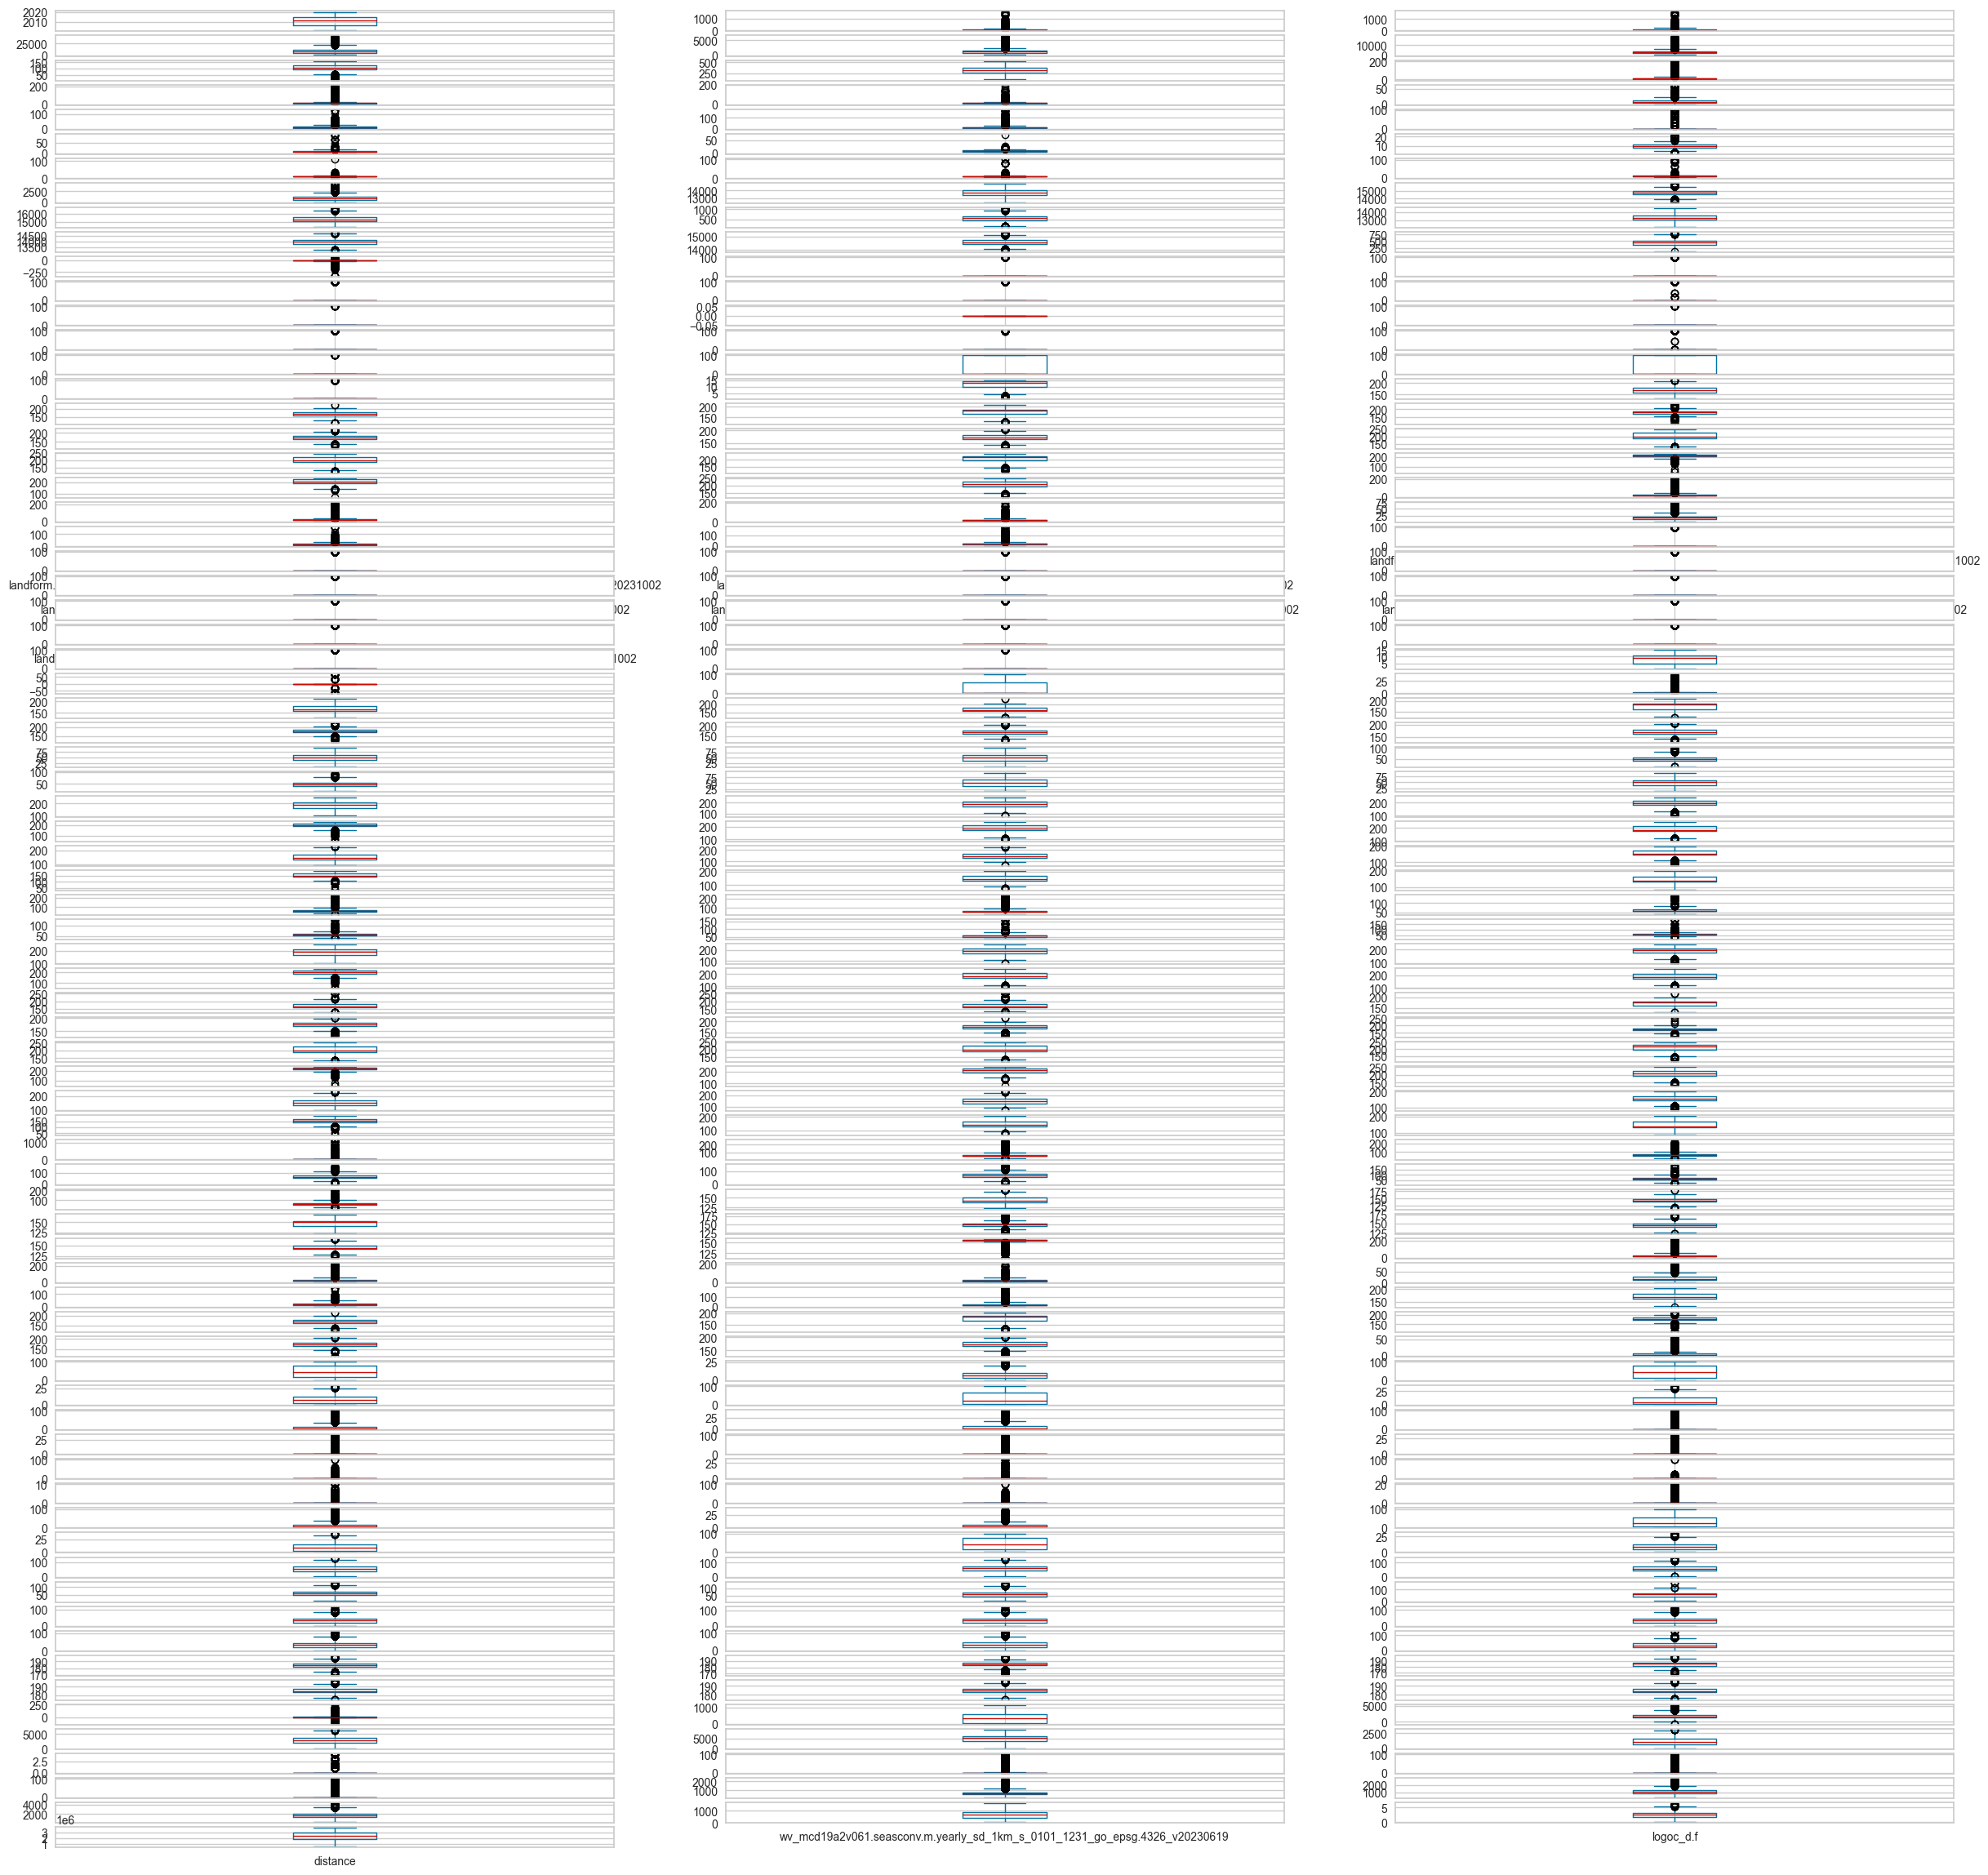

In [31]:
#Checking only for continous data types
df55.plot.box(layout =(77,3),subplots=True,figsize=(30,30))

In [32]:
list(vi2['feature'])

['hzn_top',
 'hzn_bot',
 'bioclim.var_chelsa.bio12_m_1km_s_1981_2010_go_epsg.4326_v20231002',
 'bioclim.var_chelsa.bio13_m_1km_s_1981_2010_go_epsg.4326_v20231002',
 'bioclim.var_chelsa.bio16_m_1km_s_1981_2010_go_epsg.4326_v20231002',
 'bioclim.var_chelsa.bio3_m_1km_s_1981_2010_go_epsg.4326_v20231002',
 'blue_glad.SeasConv.ard2_m_30m_s_0101_0228_go_epsg.4326_v20230908',
 'blue_glad.SeasConv.ard2_m_30m_s_0301_0430_go_epsg.4326_v20230908',
 'blue_glad.SeasConv.ard2_m_30m_s_0501_0630_go_epsg.4326_v20230908',
 'blue_glad.SeasConv.ard2_m_30m_s_0701_0831_go_epsg.4326_v20230908',
 'blue_glad.SeasConv.ard2_m_30m_s_0901_1031_go_epsg.4326_v20230908',
 'blue_glad.SeasConv.ard2_m_30m_s_1101_1231_go_epsg.4326_v20230908',
 'bsi_glad.SeasConv.ard2_m_30m_s_0501_0630_go_epsg.4326_v20230908',
 'clm_lst_mod11a2.daytime_p05_1km_s0..0cm__v1.2',
 'clm_lst_mod11a2.daytime_p50_1km_s0..0cm__v1.2',
 'clm_lst_mod11a2.daytime_p95_1km_s0..0cm__v1.2',
 'clm_lst_mod11a2.daytime_sd_1km_s0..0cm__v1.2',
 'clm_lst_mod11a

In [33]:
df55.dtypes

observation_year                                                                 int64
hzn_top                                                                          int64
hzn_bot                                                                          int64
bioclim.var_chelsa.bio12_m_1km_s_1981_2010_go_epsg.4326_v20231002                int64
bioclim.var_chelsa.bio13_m_1km_s_1981_2010_go_epsg.4326_v20231002                int64
                                                                                ...   
wv_mcd19a2v061.seasconv.m.yearly_p50_1km_s_0101_1231_go_epsg.4326_v20230619      int64
wv_mcd19a2v061.seasconv.m.yearly_p75_1km_s_0101_1231_go_epsg.4326_v20230619      int64
wv_mcd19a2v061.seasconv.m.yearly_sd_1km_s_0101_1231_go_epsg.4326_v20230619       int64
logoc_d.f                                                                      float64
distance                                                                       float64
Length: 223, dtype: object

In [34]:
from scipy.stats import zscore
import numpy as np

z = np.abs(zscore(df1[l]))
threshhold = 3
df = pd.DataFrame(np.where(z>3)[1])
df.value_counts()

25    1425
33    1198
27    1110
26    1095
28     983
13     708
38     635
39     621
9      599
22     554
18     504
34     499
17     486
2      472
42     356
41     349
8      303
14     257
1      243
40     236
16     227
35     224
4      187
19     176
11     151
15     117
21      92
31      90
32      89
6       77
3       69
7       60
20      29
5       25
10      23
36      21
29      21
37      18
24      12
43      11
dtype: int64

In [35]:
df55 = df55.T.drop_duplicates().T

In [36]:
exp_name1 = setup(data = df55, target = 'logoc_d.f', session_id=6058, train_size = 0.7)

,Description,Value
0,Session id,6058
1,Target,logoc_d.f
2,Target type,Regression
3,Original data shape,"(23898, 211)"
4,Transformed data shape,"(23898, 211)"
5,Transformed train set shape,"(16728, 211)"
6,Transformed test set shape,"(7170, 211)"
7,Numeric features,210
8,Preprocess,True
9,Imputation type,simple


In [37]:
best4 = compare_models(exclude=['lightgbm'], n_select=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3896,0.2791,0.5282,0.7327,0.1670,0.2533,6.3050
xgboost,Extreme Gradient Boosting,0.3899,0.2829,0.5317,0.7291,0.1670,0.2467,0.2060
et,Extra Trees Regressor,0.3901,0.2955,0.5433,0.7171,0.1695,0.2491,3.0480
rf,Random Forest Regressor,0.4111,0.3255,0.5703,0.6883,0.1767,0.2621,5.7220
gbr,Gradient Boosting Regressor,0.4743,0.3995,0.6319,0.6174,0.1992,0.3198,1.8510
ada,AdaBoost Regressor,0.6203,0.6166,0.7851,0.4093,0.2536,0.4528,1.0130
ridge,Ridge Regression,0.6072,0.6485,0.8050,0.3786,0.2419,0.3887,0.0330
br,Bayesian Ridge,0.6071,0.6518,0.8069,0.3754,0.2419,0.3902,0.0480
lr,Linear Regression,0.6113,0.6563,0.8097,0.3711,0.2434,0.3907,0.1760
dt,Decision Tree Regressor,0.5846,0.6720,0.8194,0.3563,0.2493,0.3250,0.1650


In [38]:
tuned_top1 = tune_model(best4[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3667,0.2492,0.4992,0.7545,0.1572,0.2182
1,0.3695,0.2562,0.5061,0.7527,0.1549,0.2062
2,0.3794,0.2697,0.5193,0.7406,0.1640,0.2142
3,0.3802,0.2715,0.5211,0.7497,0.1629,0.2457
4,0.3885,0.2959,0.5440,0.7318,0.1679,0.2692
5,0.3737,0.2660,0.5158,0.7444,0.1630,0.2573
6,0.3707,0.2514,0.5014,0.7526,0.1609,0.2518
7,0.3839,0.2680,0.5177,0.7384,0.1614,0.2374
8,0.3749,0.2656,0.5153,0.7439,0.1633,0.2019


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [39]:
tuned_top2 = tune_model(best4[1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3883,0.2752,0.5246,0.7289,0.1667,0.2371
1,0.3834,0.2715,0.5211,0.7379,0.1592,0.2123
2,0.3978,0.2950,0.5432,0.7162,0.1718,0.2310
3,0.3927,0.2889,0.5375,0.7337,0.1685,0.2745
4,0.4013,0.3036,0.5510,0.7247,0.1712,0.2645
5,0.3901,0.2937,0.5420,0.7178,0.1718,0.2785
6,0.3888,0.2731,0.5226,0.7311,0.1662,0.2575
7,0.3915,0.2755,0.5248,0.7311,0.1670,0.2501
8,0.3880,0.2741,0.5235,0.7357,0.1644,0.2099


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [41]:
blender = blend_models([tuned_top1,tuned_top2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3610,0.2423,0.4923,0.7612,0.1556,0.2184
1,0.3626,0.2449,0.4949,0.7636,0.1515,0.1997
2,0.3757,0.2648,0.5146,0.7453,0.1642,0.2166
3,0.3761,0.2675,0.5172,0.7534,0.1618,0.2524
4,0.3828,0.2874,0.5361,0.7394,0.1658,0.2604
5,0.3705,0.2684,0.5180,0.7422,0.1632,0.2582
6,0.3665,0.2453,0.4953,0.7585,0.1586,0.2509
7,0.3768,0.2606,0.5105,0.7457,0.1607,0.2399
8,0.3655,0.2518,0.5018,0.7571,0.1589,0.1982


In [46]:
predict1 = predict_model(blender, data=df2)

In [47]:
predict1

,olc_id,UUID,observation_year,hzn_top,hzn_bot,bioclim.var_chelsa.bio12_m_1km_s_1981_2010_go_epsg.4326_v20231002,bioclim.var_chelsa.bio13_m_1km_s_1981_2010_go_epsg.4326_v20231002,bioclim.var_chelsa.bio16_m_1km_s_1981_2010_go_epsg.4326_v20231002,bioclim.var_chelsa.bio2_m_1km_s_1981_2010_go_epsg.4326_v20231002,bioclim.var_chelsa.bio3_m_1km_s_1981_2010_go_epsg.4326_v20231002,...,wetlands.groundwater-driven_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wetlands.permanent_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wetlands.regularly-flooded_upmc.wtd_p_250m_b0..200cm_2010_2015_go_epsg.4326_v20231002,wv_mcd19a2v061.seasconv.m.yearly_p25_1km_s_0101_1231_go_epsg.4326_v20230619,wv_mcd19a2v061.seasconv.m.yearly_p50_1km_s_0101_1231_go_epsg.4326_v20230619,wv_mcd19a2v061.seasconv.m.yearly_p75_1km_s_0101_1231_go_epsg.4326_v20230619,wv_mcd19a2v061.seasconv.m.yearly_sd_1km_s_0101_1231_go_epsg.4326_v20230619,sample_id,distance,prediction_label
0,868F4F8F+GXM,b17f30d4-b862-11ee-843e-0242ac110004,2011,4.0,110.0,12905,1329,3737,96,291,...,15,0,0,875,1407,2418,1170,42384,1544962.125,2.035328
1,85MF3WQF+MC9,b17dc5dc-b862-11ee-843e-0242ac110004,2006,130.0,160.0,5993,732,1829,117,329,...,25,0,0,357,422,551,180,49785,2580361.250,1.792015
2,86V8MX56+X6V,b17cc57e-b862-11ee-843e-0242ac110004,2002,20.0,48.0,7351,1140,3184,91,218,...,2,0,0,441,657,1749,770,47076,2753252.250,2.737835
3,76X4XC64+FG3,b17e349a-b862-11ee-843e-0242ac110004,2008,142.0,166.0,9289,1231,2803,104,365,...,4,0,0,970,1405,2649,905,11252,781605.250,1.355317
4,86437X3R+4GF,b17ee836-b862-11ee-843e-0242ac110004,2010,0.0,12.0,8831,1171,3016,106,348,...,0,0,0,912,1535,2792,1075,11044,1039148.750,2.934389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7133,2G3XQP7C+535,5af54e1e-c065-11ee-88c9-0242ac110002,2021,15.0,30.0,10021,1121,3290,97,275,...,0,100,0,743,1205,2097,956,4728,1994475.875,3.273505
7134,2G3XRVWM+JPP,5af54e28-c065-11ee-88c9-0242ac110002,2021,30.0,60.0,10287,1172,3407,97,274,...,0,50,50,704,1289,1986,962,3383,2014159.625,2.820487
7135,2G3XRVVM+F6R,5af54e32-c065-11ee-88c9-0242ac110002,2021,0.0,30.0,10287,1172,3407,97,274,...,0,50,50,704,1289,1986,962,5714,2013934.500,3.423254
7136,2G3XCR5P+HGJ,5af54e3c-c065-11ee-88c9-0242ac110002,2021,15.0,30.0,10220,1215,3461,96,272,...,100,0,0,749,1307,1899,1030,3126,1994480.750,3.207323


In [48]:
output1 = predict1[['sample_id','prediction_label']]
output1 = output1.rename(columns={'prediction_label':'logoc_d.f'})
output1

,sample_id,logoc_d.f
0,42384,2.035328
1,49785,1.792015
2,47076,2.737835
3,11252,1.355317
4,11044,2.934389
...,...,...
7133,4728,3.273505
7134,3383,2.820487
7135,5714,3.423254
7136,3126,3.207323


In [49]:
# output1.to_csv('submission1.csv', index=False)